# 7.5 使用多层神经网络实现鸢尾花的分类

### 1.任务描述

- 下载鸢尾花数据集
- 设计多层神经网络，要求网络具有1个隐含层，隐含层有16个神经元
- 训练网络，求解模型
- 记录迭代过程中的损失和准确率
- 对损失和准确率进行可视化输出

### 2.知识准备

见教程。


### 3.任务分析

1. 确定网络结构

样本的特征数为4，类别数为3，具有1个隐含层，该层神经元数为16。其中的参数矩阵说明如下：

- $W_1$：从输入层到隐含层的权值矩阵，形状为(4,16)。
- $B_1$：隐含层的阈值，形状为(16,)
- $W_2$：从隐含层到输出层的权值矩阵，形状为(16,3)
- $B_2$：输出层的阈值，形状为(3,)

2. 选择激活函数

隐含层：使用ReLU函数
输出层：由于处理的是多分类问题，所以此处使用Softmax函。

4. 选择损失函

使用交叉熵损失函数计算损失数

### 4.任务实施


执行代码

0 ,训练集准确率: 0.43333334 ,训练集损失: 2.2054243 ,测试集准确率: 0.4 ,测试集损失: 1.721124
10 ,训练集准确率: 0.94166666 ,训练集损失: 0.20537521 ,测试集准确率: 0.96666664 ,测试集损失: 0.24966083
20 ,训练集准确率: 0.95 ,训练集损失: 0.14952078 ,测试集准确率: 1.0 ,测试集损失: 0.1670941
30 ,训练集准确率: 0.9583333 ,训练集损失: 0.12244371 ,测试集准确率: 1.0 ,测试集损失: 0.12479754
40 ,训练集准确率: 0.9583333 ,训练集损失: 0.105143175 ,测试集准确率: 1.0 ,测试集损失: 0.09992127
50 ,训练集准确率: 0.9583333 ,训练集损失: 0.092960216 ,测试集准确率: 1.0 ,测试集损失: 0.08484709


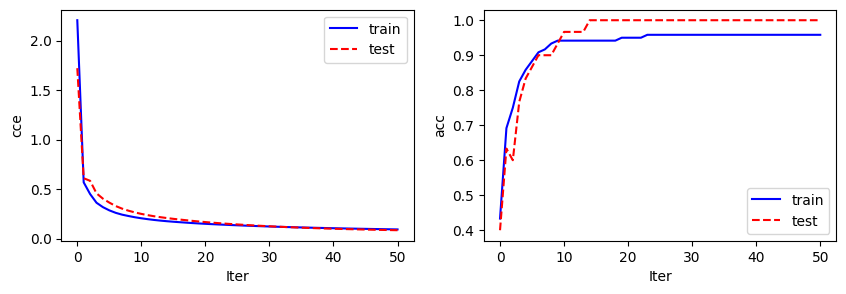

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf

# 1，数据获取
# 加载训练集
TRAIN_URL="http://download.tensorflow.org/data/iris_training.csv"
train_path=tf.keras.utils.get_file(TRAIN_URL.split('/')[-1], TRAIN_URL)
# 加载测试集
TEST_URL="http://download.tensorflow.org/data/iris_test.csv"
test_path=tf.keras.utils.get_file(TEST_URL.split('/')[-1],TEST_URL)

# 使用Pandas读取数据，得到DataFrame格式数据
df_iris_train=pd.read_csv(train_path,header=0)
df_iris_test=pd.read_csv(test_path,header=0)
# 转换成NumPy格式
iris_train=np.array(df_iris_train)
iris_test=np.array(df_iris_test)

# 2，数据预处理
# 2.1，拆分样本特征和标签
x_train = iris_train[:,0:4]
y_train = iris_train[:,4]
# print(x_train.shape,y_train.shape)

x_test = iris_test[:,0:4]
y_test = iris_test[:,4]
# print(x_test.shape,y_test.shape)

# 2.2，数据归一化
# 由于样本的4个特征值尺度相同，因此不用进行归一化

# 2.3，数据中心化
# 需要按列中心化，指定axis=0
x_train=x_train-np.mean(x_train,axis=0)
x_test=x_test-np.mean(x_test,axis=0)
# print(x_train)
# print(x_test)

# 2.4，类型转换
# 将训练集特征转为float32类型
X_train=tf.cast(x_train,tf.float32)
# 将训练集标签转为int32，再转为独热编码
Y_train=tf.one_hot(tf.constant(y_train,tf.int32),3)
# print(Y_train[0:4,:])
# 将测试集特征转为float32类型
X_test=tf.cast(x_test,tf.float32)
# 将测试集标签转为int32，再转为独热编码
Y_test=tf.one_hot(tf.constant(y_test,tf.int32),3)

# 3，设置超参数
# 学习率
learn_rate=0.5
# 迭代次数
iter=50
# 显示频率
display_step=10
# 模型参数
np.random.seed(612)
W1=tf.Variable(np.random.randn(4,16),dtype=tf.float32)
B1=tf.Variable(np.zeros([16]),dtype=tf.float32)
W2=tf.Variable(np.random.randn(16,3),dtype=tf.float32)
B2=tf.Variable(np.zeros([3]),dtype=tf.float32)

# 4，训练模型
# 训练准确率
acc_train=[]
# 测试准确率
acc_test=[]
# 训练损失
cce_train=[]
# 测试损失
cce_test=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        # 训练集隐含层线性结果
        hidden_train = tf.matmul(X_train,W1)+B1
        # 训练集隐含层输出
        Hidden_train=tf.nn.relu(hidden_train)
        # 训练集输出层线性结果
        pred_train = tf.matmul(Hidden_train,W2)+B2
        # 训练集输出层输出
        PRED_train=tf.nn.softmax(pred_train)
        # 训练集交叉熵损失
        Loss_train=tf.reduce_mean(tf.keras.metrics.categorical_crossentropy
(y_true=Y_train,y_pred=PRED_train))
        
    # 测试集隐含层线性输出
    Hidden_test=tf.nn.relu(tf.matmul(X_test,W1)+B1)
    # 测试集概率输出
    PRED_test=tf.nn.softmax(tf.matmul(Hidden_test,W2)+B2)
    # 测试集交叉熵损失
    Loss_test=tf.reduce_mean(tf.keras.metrics.categorical_crossentropy
(y_true=Y_test,y_pred=PRED_test))
    
    # 将交叉熵损失添加到列表
    cce_train.append(Loss_train)
    cce_test.append(Loss_test)
    # 计算准确率
    accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_train.
numpy(),1),y_train),tf.float32))
    accuracy_test=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_test.
numpy(),1),y_test),tf.float32))
    # 将准确率添加到数组
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    # 计算偏导数
    grads = tape.gradient(Loss_train,[W1,B1,W2,B2])
    # 更新参数
    W1.assign_sub(learn_rate*grads[0])
    B1.assign_sub(learn_rate*grads[1])
    W2.assign_sub(learn_rate*grads[2])
    B2.assign_sub(learn_rate*grads[3])
    if i % display_step==0:
        print(i,',训练集准确率:',accuracy_train.numpy(),',训练集损失:',Loss_train.numpy(),',测试集准确率:',accuracy_test.numpy(),',测试集损失:',Loss_test.numpy())
        
# 5，可视化结果
plt.figure(figsize=(10,3))
# 5.1，绘制损失
plt.subplot(121)
# 绘制训练集损失
plt.plot(cce_train,color="blue",label="train")
# 绘制测试集损失
plt.plot(cce_test,'--',color="red",label="test")
plt.xlabel("Iter")
plt.ylabel("cce")
plt.legend(["train","test"])

# 5.2，绘制准确率
plt.subplot(122)
# 绘制训练集准确率
plt.plot(acc_train,color="blue",label="train")
# 绘制测试集准确率
plt.plot(acc_test,'--',color="red",label="test")
plt.xlabel("Iter")
plt.ylabel("acc")
plt.legend(["train","test"])
plt.show()